<h1><center>MAJOR PROJECT</center></h1>

<h3>Problem Statement : For a given dataset (problem) which is the best classification algorithm (as per accuracy)</h3>

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#Reading the dataset
df = pd.read_csv('Information.csv',encoding = "latin-1")
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


<h2> EDA </h2>

In [4]:
#Keeping those data where gender is male or female
df_male = df[df["gender"] == "male"]
df_female = df[df["gender"] == "female"]
df = pd.concat([df_male,df_female])

In [5]:
#Function to clean the dataset
def clean(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

In [6]:
df['Tweets'] = [clean(s) for s in df['text']]
df['Desc'] = [clean(s) for s in df['description']]

stop = set(stopwords.words('english'))
df['Tweets'] = df['Tweets'].str.lower().str.split()
df['Tweets'] = df['Tweets'].apply(lambda x : [item for item in x if item not in stop])

for i in range(df.shape[1]):
    df[df.columns[i]] = [clean(s) for s in df[df.columns[i]]]

#'text' is cleaned and stored as 'Tweets'
#'description' is cleaned and stored as 'Desc'

In [7]:
#Dropped those where location was not available
df = df[df["tweet_location"]!="nan"]
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,Tweets,Desc
0,,false,finalized,,,male,,yes,,,...,ffffff,robbie e responds to critics after win against...,nan,,,e,main kanshk,chennai,robbie e responds critics win eddie edwards w...,i sing my own rhythm
2,,false,finalized,,,male,,yes,,,...,cdeed,i absolutely adore when louis starts the songs...,nan,,,e,clcncl,belgrade,absolutely adore louis starts songs hits hard...,louis whining and squealing and all
3,,false,finalized,,,male,,yes,,,...,cdeed,hi jordanspieth looking at the url do you use ...,nan,,,e,palo alto ca,pacific time us canada,hi jordanspieth looking url use ifttt typical...,mobile guy ers shazam google kleiner perkins y...
17,,false,finalized,,,male,,yes,,,...,cdeed,olyazzy ditto i m still learning the favourit...,nan,,,e,glasgow,london,olyazzy ditto still learning favourites retwe...,over enthusiastic f fan model llector music fa...
23,,false,finalized,,,male,,yes,,,...,cdeed,yall lmfaoo right when the chorus came on a te...,nan,,,e,tampa fl,london,yall lmfaoo right chorus came tear rolled fac...,you had me from the start
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20033,,true,golden,,nan,female,,yes,,,...,,i finally read blood of olympus and now that m...,nan,,,e,brazil,nan,finally read blood olympus children happy rea...,cis she her volleyball enthusiast i art someti...
20035,,true,golden,,nan,female,,yes,,,...,ffffff,beetlejuice is the perfect halloween movie bee...,nan,,,e,raleigh north carolina,atlantic time canada,beetlejuice perfect halloween movie beetlejui...,love my friends family the lor pink mkto foll...
20036,,true,golden,,nan,female,,yes,,,...,cdeed,itsleehinchy leesqanda what s the story in ba...,nan,,,e,yorkshire,nan,itsleehinchy leesqanda story balamory,snapchat sianfreya x ï caitlinzz ü jacks new ...
20045,,true,golden,,nan,female,,yes,,,...,cdeed,lookupondeath fine and i ll drink tea too i l...,nan,,,e,verona ªá,nan,lookupondeath fine drink tea love,rp


<h4> Q1. What are the most common emotions/words used by Males and Females? </h4>

In [8]:
male = df[df['gender'] == 'male']
female = df[df['gender'] == 'female']
male_words = pd.Series(' '.join(male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:10]
female_words = pd.Series(' '.join(female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:10]
male_words = male_words.iloc[1:]
female_words = female_words.iloc[1:]

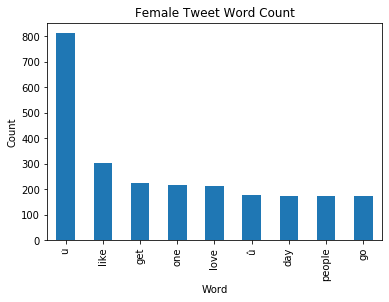

In [9]:
plt.title("Female Tweet Word Count")
plt.xlabel("Word")
plt.ylabel("Count")
female_words.plot.bar()

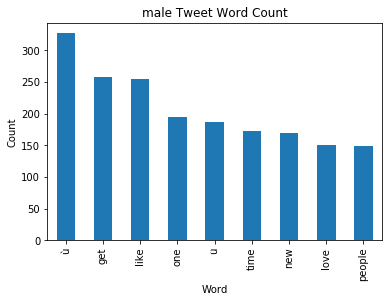

In [10]:
plt.title("male Tweet Word Count")
plt.xlabel("Word")
plt.ylabel("Count")
male_words.plot.bar()

<h4>Answer:
    <br>The most common emotions/words used by Males : ú , get
    <br>The most common emotions/words used by Females : ú , like<h4>

<h4> Q2. Which gender makes more typos in their tweets? </h4>

In [11]:
male_words = pd.Series(' '.join(male['Tweets'].astype(str)).lower().split(" "))
female_words = pd.Series(' '.join(female['Tweets'].astype(str)).lower().split(" "))

In [12]:
from textblob import TextBlob 

In [13]:
d=male_words.values
a=0
for word in d:
    b = TextBlob(word) 
    c=str(b.correct())
    if word==c:
        pass
    else:
        a=a+1

print("Total no. of male words = ",male_words.count())
print("Total no. typos by male = ",a)

Total no. of male words =  50967
Total no. typos by male =  7590


In [14]:
d=female_words.values
e=0
for word in d:
    b = TextBlob(word) 
    c=str(b.correct())
    if word==c:
        pass
    else:
        e=e+1
        
print("Total no. of female words = ",female_words.count())
print("Total no. typos by female = ",e)

Total no. of female words =  47482
Total no. typos by female =  6599


In [15]:
if (a/(male_words.count())) > (e/(female_words.count())):
    print("Males make more typos.")
else:
    print("Females make more typos.")

Males make more typos.


<h4>Answer:
    <br>Males make more typos.<h4>

<h2> Classifiaction Algorithms </h2>
<br>
<br><h3> Here, we are taking "gender" as our dependent variable and "description" as our independent variable.</h3>

In [16]:
import collections
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
#Performing Vectorization and Label Encoding
Vectorize = TfidfVectorizer(stop_words='english')
x = Vectorize.fit_transform(df['Desc'])
y = df.gender 
le = preprocessing.LabelEncoder()
y = le.fit_transform(y.values)

In [18]:
#Splitting the dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

<h3>1. Logistic Regression </h3>

In [19]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=25)
#Training the model
LogReg.fit(X_train, Y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=25, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#Testing and predicting
y_pred = LogReg.predict(X_test)

In [21]:
#Checking the accuracy
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Test set Accuracy:  0.6415180612711477


<h4> Accuracy = 64.15% </h4>

<h3>2. KNN </h3>

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=107)
#Training the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=107, p=2,
                     weights='uniform')

In [23]:
#Testing and predicting
y_pred = knn.predict(X_test)

In [24]:
#Checking the accuracy
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Test set Accuracy:  0.563328760859625


<h4> Accuracy = 56.33% </h4>

<h3>3. SVM </h3>

In [25]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',random_state=25)
#Training the model
svc.fit(X_train, Y_train)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=25,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
#Testing and predicting
y_pred = svc.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1060
           1       0.52      1.00      0.68      1127

    accuracy                           0.52      2187
   macro avg       0.26      0.50      0.34      2187
weighted avg       0.27      0.52      0.35      2187



C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
#Checking the accuracy
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Test set Accuracy:  0.5153177869227252


<h4> Accuracy = 51.53% </h4>

<h3>4. Random Forest </h3>

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=25)
#Training the model
rfc.fit(X_train, Y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [31]:
#Testing and predicting
y_pred = rfc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65      1060
           1       0.67      0.47      0.55      1127

    accuracy                           0.61      2187
   macro avg       0.62      0.61      0.60      2187
weighted avg       0.63      0.61      0.60      2187



In [33]:
#Checking the accuracy
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Test set Accuracy:  0.6095107453132145


<h4> Accuracy = 60.95% </h4>

<h3> From the above results, it is found that Logistic Regression has the greatest accuracy(64.15%) in prdicting the gender of the a user </h3>